In [1]:
%matplotlib inline

In [106]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
df = pd.read_csv('MLB_team_batting_2022.csv')
df

,Tm,W,L,W-L%,#Bat,BatAge,R/G,G,PA,AB,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Baltimore Orioles,83,79,0.512,58,27.0,4.16,162,6049,5429,...,0.390,0.695,97,2119,95,83,12,43,10,1095
1,Boston Red Sox,78,84,0.481,54,28.8,4.54,162,6144,5539,...,0.409,0.731,102,2268,131,63,12,50,23,1133
2,Chicago White Sox,81,81,0.500,44,29.3,4.23,162,6123,5611,...,0.387,0.698,96,2172,127,73,16,35,9,1117
3,Cleveland Guardians,92,70,0.568,50,25.9,4.31,162,6163,5558,...,0.383,0.699,102,2126,119,81,22,52,36,1156
4,Detroit Tigers,66,96,0.407,53,27.9,3.44,162,5870,5378,...,0.346,0.632,83,1859,108,58,10,44,8,1015
5,Houston Astros,106,56,0.654,45,29.3,4.55,162,6054,5409,...,0.424,0.743,110,2293,118,60,9,42,18,1068
6,Kansas City Royals,65,97,0.401,55,27.1,3.95,162,6010,5437,...,0.380,0.686,93,2064,101,48,20,44,7,1091
7,Los Angeles Angels,73,89,0.451,66,27.9,3.85,162,5977,5423,...,0.390,0.687,92,2116,95,54,25,25,28,1050
8,Minnesota Twins,78,84,0.481,61,26.9,4.30,162,6113,5476,...,0.401,0.718,105,2195,133,62,10,46,11,1126
9,New York Yankees,99,63,0.611,54,30.2,4.98,162,6172,5422,...,0.426,0.751,114,2311,121,70,14,41,36,1093


In [108]:
df_indexed = df.set_index('Tm')

In [109]:
relevant_data = df_indexed[['W','BB']]
relevant_data

,W,BB
Tm,,
Baltimore Orioles,83,476
Boston Red Sox,78,478
Chicago White Sox,81,388
Cleveland Guardians,92,450
Detroit Tigers,66,380
Houston Astros,106,528
Kansas City Royals,65,460
Los Angeles Angels,73,449
Minnesota Twins,78,518


In [110]:
from sklearn.decomposition import TruncatedSVD 

In [111]:
matrix_dense = relevant_data.to_numpy()
relevant_data

,W,BB
Tm,,
Baltimore Orioles,83,476
Boston Red Sox,78,478
Chicago White Sox,81,388
Cleveland Guardians,92,450
Detroit Tigers,66,380
Houston Astros,106,528
Kansas City Royals,65,460
Los Angeles Angels,73,449
Minnesota Twins,78,518


In [112]:
k=4

In [113]:
cluster_model = KMeans(n_clusters=k)

In [114]:
cluster_model.fit(relevant_data)

KMeans(n_clusters=4)

In [115]:
cluster_labels = cluster_model.predict(relevant_data)
team_cluster_df = pd.DataFrame(cluster_labels, index=relevant_data.index, columns=["cluster"])

In [116]:
team_cluster_df["cluster"].value_counts()

2    14
1     8
3     6
0     2
Name: cluster, dtype: int64

Text(0, 0.5, 'Wins')

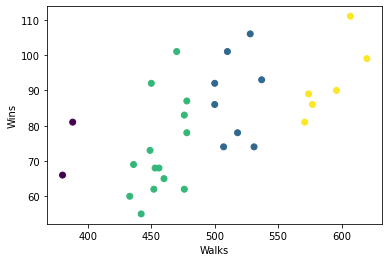

In [117]:
plt.scatter(relevant_data['BB'], relevant_data['W'], c=team_cluster_df["cluster"])
plt.xlabel("Walks")
plt.ylabel("Wins")

In [118]:
svd = TruncatedSVD(n_components=2)

In [119]:
svd.fit(df_indexed)

TruncatedSVD()

In [120]:
matrix_reduced = svd.transform(df_indexed)

In [121]:
np.mean(matrix_reduced, axis=0)

array([8.79050537e+03, 2.70827101e+00])

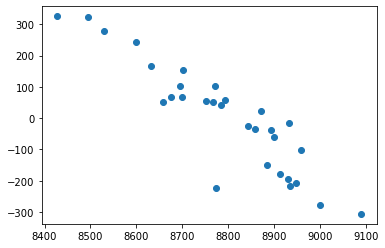

In [122]:
plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1])

In [123]:
from sklearn.cluster import AgglomerativeClustering

k = 4

model = AgglomerativeClustering(n_clusters=k)

In [124]:
model.fit(matrix_reduced)

AgglomerativeClustering(n_clusters=4)

In [125]:
team_cluster_df["cluster"] = model.labels_

In [126]:
team_cluster_df[["cluster"]]


,cluster
Tm,
Baltimore Orioles,0
Boston Red Sox,1
Chicago White Sox,3
Cleveland Guardians,3
Detroit Tigers,2
Houston Astros,1
Kansas City Royals,0
Los Angeles Angels,0
Minnesota Twins,3


In [127]:
team_cluster_df["cluster"].value_counts()

0    12
1     9
3     6
2     3
Name: cluster, dtype: int64

Text(0, 0.5, 'Wins')

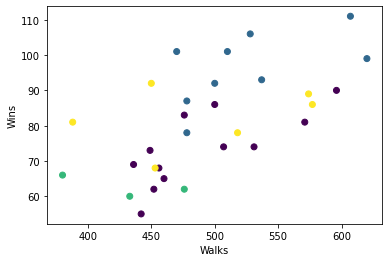

In [128]:
plt.scatter(relevant_data['BB'], relevant_data['W'], c=team_cluster_df["cluster"])
plt.xlabel("Walks")
plt.ylabel("Wins")

In [129]:
silhouette_scores = []
for test_k in range(2, 15, 1):
    print(test_k)
    
    tmp_model = KMeans(n_clusters=test_k)
    tmp_model.fit(df_indexed[['BB', 'W']])
    
    score = silhouette_score(df_indexed[['BB', 'W']], tmp_model.labels_)
    silhouette_scores.append((test_k, score))

2
3
4
5
6
7
8
9
10
11
12
13
14


In [130]:
silhouette_df = pd.DataFrame(silhouette_scores, columns=["k-value", "score"])
silhouette_df

,k-value,score
0,2,0.541840
1,3,0.495990
2,4,0.557545
3,5,0.508408
4,6,0.482267
5,7,0.465435
6,8,0.423838
7,9,0.423326
8,10,0.451077
9,11,0.443462


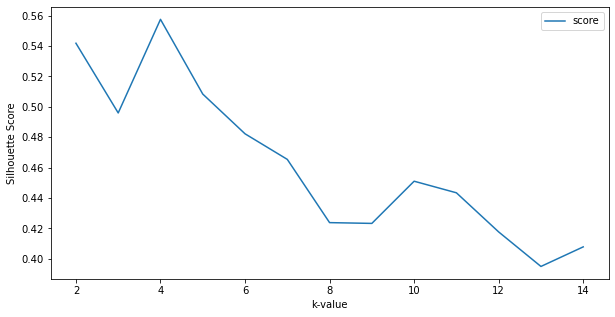

In [131]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

silhouette_df.plot("k-value", "score", ax=ax)

ax.set_ylabel("Silhouette Score")

plt.show()